In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
ds = pd.read_csv("beauty.csv")
ds.head()

,wage,exper,union,goodhlth,black,female,married,service,educ,looks
0,5.73,30,0,1,0,1,1,1,14,4
1,4.28,28,0,1,0,1,1,0,12,3
2,7.96,35,0,1,0,1,0,0,10,4
3,11.57,38,0,1,0,0,1,1,16,3
4,11.42,27,0,1,0,0,1,0,16,3


In [3]:
ds.describe()

,wage,exper,union,goodhlth,black,female,married,service,educ,looks
count,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000
mean,6.306690,18.206349,0.272222,0.933333,0.073810,0.346032,0.691270,0.273810,12.563492,3.185714
std,4.660639,11.963485,0.445280,0.249543,0.261564,0.475892,0.462153,0.446089,2.624489,0.684877
min,1.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,1.000000
25%,3.707500,8.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,12.000000,3.000000
50%,5.300000,15.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,12.000000,3.000000
75%,7.695000,27.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,13.000000,4.000000
max,77.720000,48.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,17.000000,5.000000


In [4]:
X = ds.iloc[: , 0:9]
print(X);
Y =  ds.iloc[: , 9]
#print(Y)
X_std = (X-np.mean(X,axis = 0))/np.std(X,axis = 0)
#print(X_std)

       wage  exper  union  goodhlth  black  female  married  service  educ
0      5.73     30      0         1      0       1        1        1    14
1      4.28     28      0         1      0       1        1        0    12
2      7.96     35      0         1      0       1        0        0    10
3     11.57     38      0         1      0       0        1        1    16
4     11.42     27      0         1      0       0        1        0    16
...     ...    ...    ...       ...    ...     ...      ...      ...   ...
1255   1.61     25      0         1      1       1        0        1    12
1256   1.68      4      0         1      0       1        1        1    12
1257   3.29     35      0         1      1       1        0        1    12
1258   2.31     15      0         1      1       1        1        1    10
1259   1.92     24      0         0      0       1        0        1    16

[1260 rows x 9 columns]


In [5]:
cov_matrix = np.cov(X_std, rowvar=False)
print('Covariance matrix of X: \n%s' %cov_matrix)

Covariance matrix of X: 
[[ 1.00079428  0.23481858  0.0946043   0.00676103 -0.05909863 -0.31366838
   0.18466733 -0.05369538  0.21250147]
 [ 0.23481858  1.00079428  0.08986375 -0.13171306  0.00757247 -0.24740507
   0.25580996 -0.05737398 -0.18634784]
 [ 0.0946043   0.08986375  1.00079428 -0.02241542  0.03196405 -0.10011687
   0.05367115 -0.10371526 -0.09609805]
 [ 0.00676103 -0.13171306 -0.02241542  1.00079428 -0.03409991 -0.03971586
  -0.01332585  0.04998619  0.10721456]
 [-0.05909863  0.00757247  0.03196405 -0.03409991  1.00079428  0.11379314
  -0.13341229  0.01727502 -0.13826657]
 [-0.31366838 -0.24740507 -0.10011687 -0.03971586  0.11379314  1.00079428
  -0.31948149  0.26817418  0.00911237]
 [ 0.18466733  0.25580996  0.05367115 -0.01332585 -0.13341229 -0.31948149
   1.00079428 -0.07514166 -0.0477122 ]
 [-0.05369538 -0.05737398 -0.10371526  0.04998619  0.01727502  0.26817418
  -0.07514166  1.00079428  0.30186805]
 [ 0.21250147 -0.18634784 -0.09609805  0.10721456 -0.13826657  0.009112

In [9]:
eigenvalues, eigenvectors, = np.linalg.eig(cov_matrix)
print("eigenvalues are : \n%s" %eigenvalues)
print("eigenvectors are : \n%s" %eigenvectors)

eigenvalues are : 
[1.93082652 1.44932948 0.48680527 0.57509819 0.71123256 1.0680104
 1.00704309 0.86632281 0.91248023]
eigenvectors are : 
[[-0.39075042 -0.37431696 -0.35842829  0.51616056  0.18632837 -0.21534132
  -0.29951834 -0.37608773  0.00806248]
 [-0.43784404  0.10692202  0.41985412 -0.13071689  0.55010507 -0.43934112
   0.09092013  0.21570905 -0.23035367]
 [-0.21110979  0.16689076  0.05000709 -0.04935103 -0.06746099  0.0063897
  -0.64315833  0.42517375  0.568882  ]
 [ 0.0764886  -0.28119378  0.06465978  0.09336686  0.2566213   0.57373921
  -0.35535894  0.33747642 -0.51670089]
 [ 0.12405345  0.34697973  0.09763074 -0.05084643 -0.3745707  -0.34230144
  -0.51731304 -0.22591832 -0.52533165]
 [ 0.52629616  0.13085222  0.27569069  0.71417196  0.13970047 -0.21469836
   0.03969534  0.20318474  0.10663835]
 [-0.44230333 -0.12718162  0.09975446  0.32136397 -0.62952531 -0.02382384
   0.27253787  0.41290038 -0.18257475]
 [ 0.3124267  -0.3756947  -0.4752253  -0.24487642  0.00284938 -0.50263

In [11]:
eig_pairs = [(eigenvalues[index], eigenvectors[:,index]) for index in range(len(eigenvalues))]
print(eig_pairs)
eig_pairs.sort()
eig_pairs.reverse()
eigvalues_sort = [eig_pairs[index][0] for index in range(len(eigenvalues))]
eigvectors_sort = [eig_pairs[index][1] for index in range(len(eigenvalues))]
print('Eigenvalues in descending order: \n%s' %eigvalues_sort)

[(1.9308265150468291, array([-0.39075042, -0.43784404, -0.21110979,  0.0764886 ,  0.12405345,
        0.52629616, -0.44230333,  0.3124267 ,  0.13989026])), (1.44932947798427, array([-0.37431696,  0.10692202,  0.16689076, -0.28119378,  0.34697973,
        0.13085222, -0.12718162, -0.3756947 , -0.66835105])), (0.48680526657818574, array([-0.35842829,  0.41985412,  0.05000709,  0.06465978,  0.09763074,
        0.27569069,  0.09975446, -0.4752253 ,  0.60600571])), (0.5750981852979331, array([ 0.51616056, -0.13071689, -0.04935103,  0.09336686, -0.05084643,
        0.71417196,  0.32136397, -0.24487642, -0.17167488])), (0.7112325565367525, array([ 0.18632837,  0.55010507, -0.06746099,  0.2566213 , -0.3745707 ,
        0.13970047, -0.62952531,  0.00284938, -0.19008158])), (1.0680104026870394, array([-0.21534132, -0.43934112,  0.0063897 ,  0.57373921, -0.34230144,
       -0.21469836, -0.02382384, -0.50263085, -0.12214325])), (1.0070430870632177, array([-0.29951834,  0.09092013, -0.64315833, -0.

Cumulative proportion of variance explained vector: 
[0.21436601 0.37527481 0.49384846 0.60565333 0.70695955 0.80314125
 0.88210437 0.94595345 1.        ]


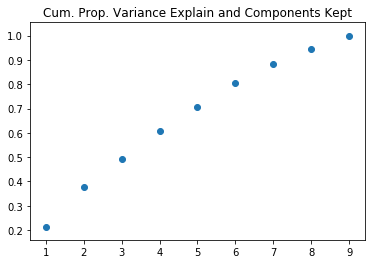

In [13]:
var_comp_sum = np.cumsum(eigvalues_sort)/sum(eigvalues_sort)
print("Cumulative proportion of variance explained vector: \n%s" %var_comp_sum)
num_comp = range(1,len(eigvalues_sort)+1)
plt.title('Cum. Prop. Variance Explain and Components Kept')
plt.scatter(num_comp, var_comp_sum)
plt.show()

In [16]:
P_reduce = np.array(eigvectors_sort[0:2]).transpose()
Proj_data_2D = np.dot(X_std,P_reduce)

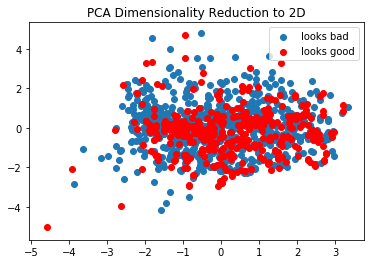

In [20]:
negative = plt.scatter(Proj_data_2D[:,0][Y == 3], Proj_data_2D[:,1][Y == 3])
positive = plt.scatter(Proj_data_2D[:,0][Y == 4], Proj_data_2D[:,1][Y == 4], color = "red")
plt.title('PCA Dimensionality Reduction to 2D')
plt.legend([negative,positive],["looks bad", "looks good"])
plt.show()


In [21]:
P_reduce = np.array(eigvectors_sort[0:3]).transpose()
Proj_data_3D = np.dot(X_std,P_reduce)

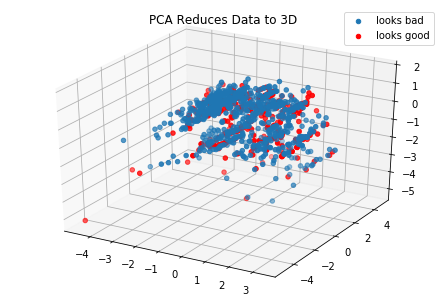

In [26]:
fig = plt.figure()
ax = Axes3D(fig)
negative = ax.scatter(Proj_data_3D[:,0][Y == 3], Proj_data_3D[:,1][Y == 3] ,Proj_data_3D[:,2][Y == 3])
positive = ax.scatter(Proj_data_3D[:,0][Y == 4], Proj_data_3D[:,1][Y == 4], Proj_data_3D[:,2][Y == 4], color = "red")
ax.set_title('PCA Reduces Data to 3D')
plt.legend([negative,positive],["looks bad", "looks good"])
plt.show()